In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Setup

In [3]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target='species')

,Description,Value
0,Session id,4104
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [5]:
# check the type
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [6]:
# init setup on exp
exp.setup(data, target='species')

,Description,Value
0,Session id,3601
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


### Compare Models

In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9818,0.9976,0.9818,0.9818,0.9818,0.9725,0.9725,0.0080
lr,Logistic Regression,0.9809,0.9976,0.9809,0.9847,0.9801,0.9707,0.9732,0.9440
knn,K Neighbors Classifier,0.9809,0.9889,0.9809,0.9847,0.9801,0.9707,0.9732,0.3860
catboost,CatBoost Classifier,0.9809,0.9976,0.9809,0.9847,0.9801,0.9707,0.9732,0.4780
dt,Decision Tree Classifier,0.9718,0.9795,0.9718,0.9743,0.9718,0.9576,0.9589,0.0090
qda,Quadratic Discriminant Analysis,0.9718,0.9945,0.9718,0.9743,0.9718,0.9576,0.9589,0.0100
et,Extra Trees Classifier,0.9718,0.9976,0.9718,0.9738,0.9714,0.9571,0.9585,0.0460
lightgbm,Light Gradient Boosting Machine,0.9709,0.9964,0.9709,0.9767,0.9696,0.9553,0.9592,0.1160
nb,Naive Bayes,0.9618,0.9976,0.9618,0.9663,0.9614,0.9422,0.9448,0.0080
rf,Random Forest Classifier,0.9618,0.9976,0.9618,0.9663,0.9614,0.9422,0.9448,0.0560


In [8]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9818,0.9916,0.9818,0.9855,0.9815,0.9725,0.9747,0.3980
qda,Quadratic Discriminant Analysis,0.9809,1.0000,0.9809,0.9852,0.9805,0.9711,0.9735,0.0100
lda,Linear Discriminant Analysis,0.9809,1.0000,0.9809,0.9852,0.9805,0.9711,0.9735,0.0090
lr,Logistic Regression,0.9627,0.9974,0.9627,0.9707,0.9620,0.9436,0.9482,1.0420
lightgbm,Light Gradient Boosting Machine,0.9618,0.9909,0.9618,0.9705,0.9610,0.9422,0.9470,0.0930
et,Extra Trees Classifier,0.9536,0.9961,0.9536,0.9658,0.9518,0.9298,0.9373,0.0540
rf,Random Forest Classifier,0.9445,0.9948,0.9445,0.9624,0.9395,0.9161,0.9276,0.0600
gbc,Gradient Boosting Classifier,0.9436,0.9831,0.9436,0.9559,0.9425,0.9147,0.9217,0.0580
xgboost,Extreme Gradient Boosting,0.9355,0.9794,0.9355,0.9556,0.9304,0.9025,0.9151,0.0400
nb,Naive Bayes,0.9345,0.9922,0.9345,0.9438,0.9333,0.9009,0.9065,0.0110


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Analyze Model

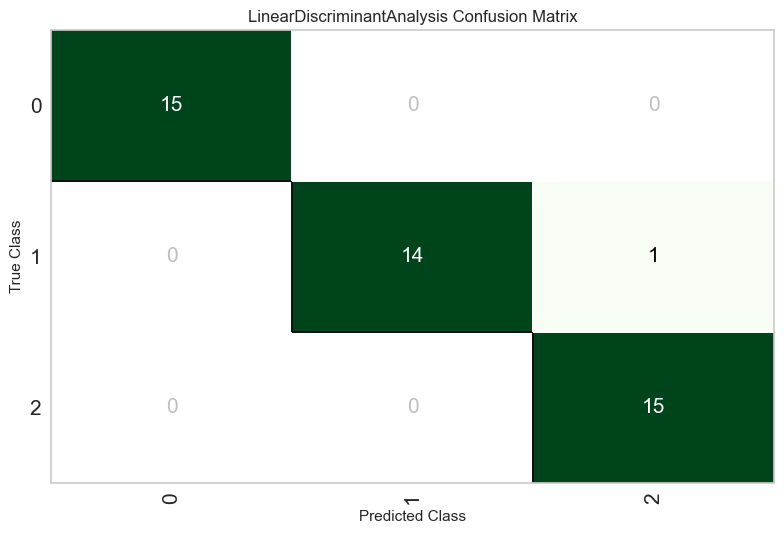

In [9]:
# plot confusion matrix
plot_model(best, plot='confusion_matrix')

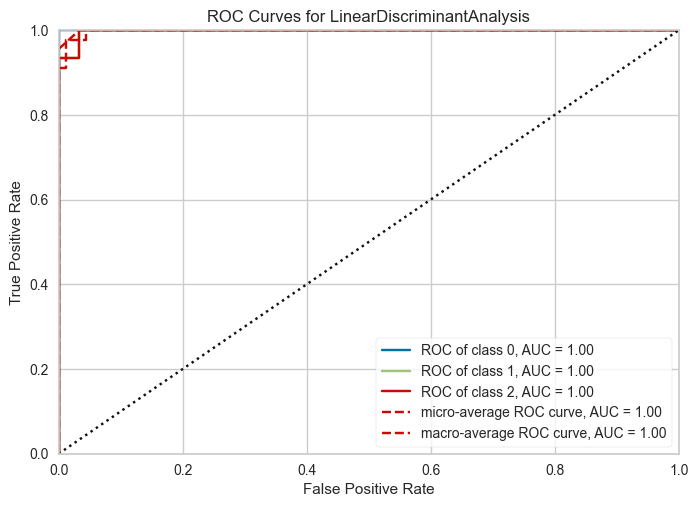

In [10]:
# plot AUC
plot_model(best, plot='auc')

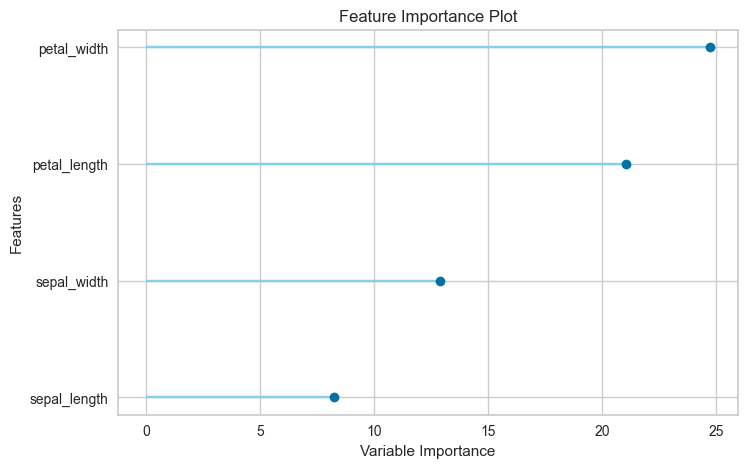

In [11]:
# plot feature importance
plot_model(best, plot='feature')

In [12]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9778,0.9985,0.9778,0.9792,0.9778,0.9667,0.9674


In [15]:
# show predictions df
holdout_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
87,6.3,2.3,4.4,1.3,1,Iris-versicolor,0.9997
79,5.7,2.6,3.5,1.0,1,Iris-versicolor,1.0000
80,5.5,2.4,3.8,1.1,1,Iris-versicolor,1.0000
34,4.9,3.1,1.5,0.1,0,Iris-setosa,1.0000
83,6.0,2.7,5.1,1.6,1,Iris-virginica,0.9652


In [16]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('species', axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# predict model on new_data
predictions = predict_model(best, data=new_data)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0


### Save Model

In [19]:
# save pipeline
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               c

In [21]:
# load pipeline
loaded_best_pipeline = load_model('my_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\mhmtc\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=F...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

### DETAILED OVERVIEW - TODO